In [54]:
# Due to IFrame incompatibility on GitHub, please view this notebook at this URL to view all plotly maps, which do not show below:
# https://nbviewer.jupyter.org/github/usmanakhter/cms_opioid/blob/master/opioid_prescribing.ipynb

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy

#plotly
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [55]:
#create opioid #dataframe from csv
opioid_df = pd.read_csv("opioid2016.csv")

#preview data
opioid_df.info()
opioid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131550 entries, 0 to 1131549
Data columns (total 11 columns):
NPI                                         1131550 non-null int64
NPPES Provider Last Name                    1131518 non-null object
NPPES Provider First Name                   1131518 non-null object
NPPES Provider ZIP Code                     1131497 non-null float64
NPPES Provider State                        1131550 non-null object
Specialty Description                       1131550 non-null object
Total Claim Count                           1131550 non-null int64
Opioid Claim Count                          812547 non-null float64
Opioid Prescribing Rate                     812547 non-null float64
Extended-Release Opioid Claims              1003036 non-null float64
Extended-Release Opioid Prescribing Rate    388564 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 95.0+ MB


,NPI,NPPES Provider ZIP Code,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Extended-Release Opioid Claims,Extended-Release Opioid Prescribing Rate
count,1.131550e+06,1.131497e+06,1.131550e+06,812547.000000,812547.000000,1.003036e+06,388564.000000
mean,1.499842e+09,4.806815e+04,1.308800e+03,96.173274,10.972242,5.367090e+00,2.668037
std,2.879109e+08,3.029548e+04,3.147395e+03,315.482373,17.424112,4.679540e+01,7.169746
min,1.003000e+09,0.000000e+00,1.100000e+01,0.000000,0.000000,0.000000e+00,0.000000
25%,1.245689e+09,2.120100e+04,5.400000e+01,0.000000,0.000000,0.000000e+00,0.000000
50%,1.497973e+09,4.503900e+04,2.000000e+02,19.000000,2.901024,0.000000e+00,0.000000
75%,1.740699e+09,7.657400e+04,1.000000e+03,69.000000,14.152168,0.000000e+00,0.000000
max,1.993000e+09,9.992900e+04,3.242090e+05,21772.000000,100.000000,5.548000e+03,100.000000


In [56]:
#clean up column titles
opioid_df.columns = opioid_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [57]:
opioid_df.head()

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,extended-release_opioid_claims,extended-release_opioid_prescribing_rate
0,1003000126,ENKESHAFI,ARDALAN,21502.0,MD,Internal Medicine,545,23.0,4.220183,NaN,NaN
1,1003000142,KHALIL,RASHID,43623.0,OH,Anesthesiology,1733,1004.0,57.934218,63.0,6.2749
2,1003000167,ESCOBAR,JULIO,89403.0,NV,Dentist,49,11.0,22.448980,0.0,0.0000
3,1003000282,BLAKEMORE,ROSIE,37243.0,TN,Nurse Practitioner,146,NaN,NaN,0.0,NaN
4,1003000407,GIRARDI,DAVID,15825.0,PA,Family Practice,2225,17.0,0.764045,0.0,0.0000


The dataset has about 1.1 million doctors, which a quick Google search confirms is the number of all doctors in America. Data is missing on opioid and extended-release opioid claims, because not all physicians prescribe opioids. Also, some 0s are NaNs are interchanged, which may explain why there is less data on extended-release prescribing rate than extended-release claims.

<h2> Who prescribes the most opioids? </h2>

In [58]:
opioid_df.sort_values(by='opioid_claim_count', ascending=False).head(10)

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,extended-release_opioid_claims,extended-release_opioid_prescribing_rate
363670,1326019712,MURPHY,MARK,35601.0,AL,Pain Management,32039,21772.0,67.954680,5548.0,25.482271
850551,1750347605,MURCIANO,ENRIQUE,33143.0,FL,Anesthesiology,30232,19563.0,64.709579,1453.0,7.427286
366525,1326092610,PATEL,ALPESH,70809.0,LA,Interventional Pain Management,28962,18502.0,63.883710,3840.0,20.754513
364323,1326035163,GARLAPATI,BUTCHAIAH,72117.0,AR,Physical Medicine and Rehabilitation,29059,17753.0,61.092949,3668.0,20.661297
690563,1619004744,MCGEE,DARIUS,39440.0,MS,Nurse Practitioner,27228,16456.0,60.437785,974.0,5.918814
48157,1043276488,CHAO,RAUL,33143.0,FL,Interventional Pain Management,23556,16045.0,68.114281,636.0,3.963852
805483,1710085196,LEDFORD,MELANIE,40353.0,KY,Physical Medicine and Rehabilitation,25693,15859.0,61.724983,1687.0,10.637493
1086409,1962405035,MARTUCCI,MARTIN,74104.0,OK,Pain Management,20052,15527.0,77.433672,3254.0,20.957043
401355,1356427850,KABAKIBOU,KAMAL,30327.0,GA,Pain Management,26989,15397.0,57.049168,3225.0,20.945639
81433,1073555397,REHEEM,MEDHAT,34613.0,FL,Interventional Pain Management,22086,15285.0,69.206737,3564.0,23.316977


<h4>Who are the biggest prescribers outside of Pain, Physical Medicine, and Anesthesiology specialties?</h4>

In [59]:
opioid_df[~opioid_df['specialty_description'].str.contains("Pain|Rehabilitation|Anesthesiology")].sort_values(by='opioid_claim_count', ascending=False).head(10)

,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,extended-release_opioid_claims,extended-release_opioid_prescribing_rate
690563,1619004744,MCGEE,DARIUS,39440.0,MS,Nurse Practitioner,27228,16456.0,60.437785,974.0,5.918814
137357,1124047717,RICHARD,JOHN,40513.0,KY,Family Practice,225692,10012.0,4.436134,221.0,2.207351
928894,1821035916,KIM,DONALD,73170.0,OK,Internal Medicine,16058,9849.0,61.333915,1968.0,19.981724
324626,1285761833,FRINKS,TERENCE,30084.0,GA,Family Practice,324209,9606.0,2.962904,561.0,5.840100
545859,1487613642,ORTOLANI,JOHN,32117.0,FL,Neurology,20367,9476.0,46.526243,861.0,9.086112
119994,1104852888,RODGERS,RANDALL,75791.0,TX,Family Practice,16564,9199.0,55.536102,986.0,10.718556
624031,1558321612,BROWN,COLUMBUS,72205.0,AR,Rheumatology,17972,9179.0,51.073893,647.0,7.048698
986336,1871551804,RUBEL,CHRISTOPHER,29307.0,SC,Family Practice,13471,9121.0,67.708411,1030.0,11.292621
169863,1154313807,DYAS,LLOYD,35653.0,AL,Orthopedic Surgery,17554,9106.0,51.874217,160.0,1.757083
154251,1134362288,BARRIO,GEORGE,32405.0,FL,Neurology,18617,8777.0,47.145082,1064.0,12.122593


...Family and Internal Medicine. A couple Family docs (Richard and Frinks) are in the top 10 despite <5% opioid prescribing rates, because their total claims are over 200K...heavy prescribers! I also did not know Neurologists prescribe opioids.

<h4>Which states have the most opioid prescriptions?</h4>

In [60]:
opioid_df.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False).head(10)[['total_claim_count', 'opioid_claim_count', 'extended-release_opioid_claims']]

,total_claim_count,opioid_claim_count,extended-release_opioid_claims
nppes_provider_state,,,
CA,138635091,6956583.0,530420.0
FL,107208736,5568389.0,477537.0
TX,91924608,5012297.0,236440.0
PA,75241541,3525981.0,253939.0
MI,49958016,3337506.0,234558.0
OH,63581782,3205897.0,170211.0
NC,53717099,3192021.0,231591.0
TN,41292770,2877947.0,245536.0
NY,96818184,2845381.0,196562.0


In [61]:
#drop non-top-5 states and non-relevant columns
dropped1=opioid_df.drop(opioid_df[~((opioid_df.nppes_provider_state=='CA') | (opioid_df.nppes_provider_state=='FL') | (opioid_df.nppes_provider_state=='TX') | (opioid_df.nppes_provider_state=='PA') | (opioid_df.nppes_provider_state=='MI'))].index)
dropped2=dropped1[['nppes_provider_state', 'total_claim_count', 'opioid_claim_count', 'extended-release_opioid_claims']]

#group data by state
top_states_df=dropped2.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False)
top_states_df.reset_index(inplace=True)
top_states_df.head(10)

,nppes_provider_state,total_claim_count,opioid_claim_count,extended-release_opioid_claims
0,CA,138635091,6956583.0,530420.0
1,FL,107208736,5568389.0,477537.0
2,TX,91924608,5012297.0,236440.0
3,PA,75241541,3525981.0,253939.0
4,MI,49958016,3337506.0,234558.0


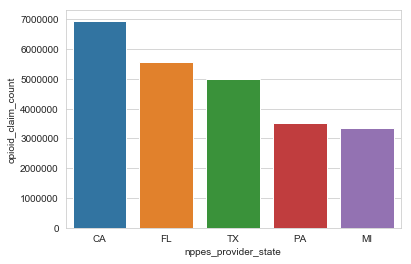

In [62]:
#graph opioid prescriptions by top states
sns.barplot(x="nppes_provider_state", y="opioid_claim_count", data=top_states_df);

...California, Florida, Texas, Pennsylvania and Michigan

In [63]:
#map of top opioid-prescribing states
dropped3=opioid_df[['nppes_provider_state', 'opioid_claim_count']]
top_states_map_df=dropped3.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False)
top_states_map_df.reset_index(inplace=True)

In [64]:
trc=dict(
    type='choropleth',
    locations=top_states_map_df['nppes_provider_state'],
    locationmode='USA-states',
    colorscale=[[0, 'rgb(255, 255, 255)'], [0.5, 'rgb(255, 200, 200)'], [1.0, 'rgb(255, 0, 0)']], 
    z=top_states_map_df['opioid_claim_count'])
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)
plotly.offline.iplot(map)

This makes sense... CA, TX, FL make up the top 3 most populous states in America with PA and MI in the top 10. A more interesting statistic would be opioid per capita.

In [84]:
#create state populations dataframe from csv; data taken from https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
state_populations_df = pd.read_csv("state_populations.csv")

#rename state column to merge opioid_df w/ state_populations_df on common state column
state_populations_df.rename(columns={'state' : 'nppes_provider_state'}, inplace=True)

#preview
state_populations_df.head(10)

,nppes_provider_state,state_population,national_population_percent
0,CA,"39,536,653",12.14%
1,TX,"28,304,596",8.69%
2,FL,"20,984,400",6.44%
3,NY,"19,849,399",6.09%
4,PA,"12,805,537",3.93%
5,IL,"12,173,837",3.93%
6,OH,"11,658,609",3.58%
7,GA,"10,429,379",3.20%
8,NC,"10,273,419",3.15%
9,MI,"9,962,311",3.06%


In [112]:
#group opioid_df by state
dropped4=opioid_df[['nppes_provider_state', 'total_claim_count', 'opioid_claim_count', 'extended-release_opioid_claims']]
dropped4=dropped4.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_count', ascending=False)
dropped4.reset_index(inplace=True)

#merge the datasets
opioid_withcapita_df=pd.merge(dropped4, state_populations_df, how='left', on='nppes_provider_state')

#drop national_population_percent, convert state_population from object to float64
opioid_withcapita_df.drop(columns=['national_population_percent'], inplace=True)
opioid_withcapita_df['state_population'] = opioid_withcapita_df['state_population'].str.replace(',', '')
opioid_withcapita_df['state_population'] = pd.to_numeric(opioid_withcapita_df['state_population'])

#create opioid_per_capita column
opioid_withcapita_df['opioid_claim_per_capita'] = opioid_withcapita_df['total_claim_count']/opioid_withcapita_df['state_population']

#group data by opioid_claim_per_capita
opioid_bycapita_df=opioid_withcapita_df.groupby('nppes_provider_state').sum().sort_values(by='opioid_claim_per_capita', ascending=False)
opioid_bycapita_df.reset_index(inplace=True)

#preview merged dataset
opioid_bycapita_df.head(10)


,nppes_provider_state,total_claim_count,opioid_claim_count,extended-release_opioid_claims,state_population,opioid_claim_per_capita
0,PR,27553537,415004.0,1640.0,3337177.0,8.256540
1,WV,13006175,685130.0,28485.0,1815857.0,7.162555
2,KY,30898947,1697521.0,76244.0,4454189.0,6.937053
3,MS,18350416,1094382.0,46299.0,2984100.0,6.149397
4,TN,41292770,2877947.0,245536.0,6715984.0,6.148432
5,AR,18139502,1155171.0,65819.0,3004279.0,6.037889
6,MO,36319542,2008383.0,115326.0,6113532.0,5.940844
7,RI,6289633,218898.0,10516.0,1059639.0,5.935638
8,AL,28882148,2156504.0,120579.0,4874747.0,5.924851
9,PA,75241541,3525981.0,253939.0,12805537.0,5.875704


Puerto Rico surprised me as the clear leader in opioid claims/capita. The presence of these southern/Applachian states comprising the top 10 aligns more with the opioid epidemic narrative.

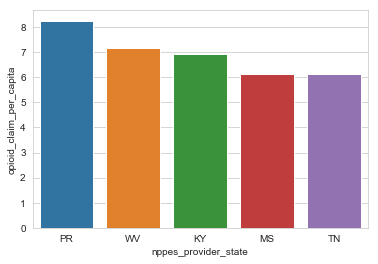

In [115]:
opioid_bycapita_5=opioid_bycapita_df[:5]

#plot top 5 opioid per capita states
sns.barplot(x="nppes_provider_state", y="opioid_claim_per_capita", data=opioid_bycapita_5);

In [120]:
#map of top opioid per capita states
opioid_bycapita_map=opioid_bycapita_df[['nppes_provider_state', 'opioid_claim_per_capita']]
trc=dict(
    type='choropleth',
    locations=opioid_bycapita_map['nppes_provider_state'],
    locationmode='USA-states',
    colorscale=[[0, 'rgb(255, 255, 255)'], [0.5, 'rgb(153, 204, 255)'], [1.0, 'rgb(0, 0, 102)']], 
    z=opioid_bycapita_map['opioid_claim_per_capita'])
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)
plotly.offline.iplot(map)


California and Texas are relatively low after accounting for per capita. The southern and Applachian states experience highest opioid claims per capita.